In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os

sys.path.append(os.path.abspath("../../"))
from utils import plot_functions as pf

In [3]:

data = pd.read_csv('../../data/PM4Silt/CDSSPm4silt3.csv')
params = pd.read_csv('../../data/PM4Silt/DSSPm4silt_params3.csv')


data['N'] = np.linspace(0,4,len(data['p']))

data['p_ast']=(data['sx']+data['sy'])/2
data['sxx'] = data['sx']-data['p_ast']
data['syy'] = data['sy']-data['p_ast']
data['szz'] = data['sz']-data['p_ast']
data['rxx'] = data['sxx']/data['p_ast']
data['ryy'] = data['syy']/data['p_ast']
data['rxy'] = data['sxy']/data['p_ast']
data['rzz'] = data['szz']/data['p_ast']
data['norms'] = np.sqrt(data['sxx']**2+data['syy']**2+2*data['sxy']**2)
data['q_ast'] = np.sqrt(2)*data['norms'] 

data['sxy_der'] = data['sxy']-data['sxy'].shift(1)
data['sxy_der'] = data['sxy_der'].fillna(0)*-1

data['N'] = np.linspace(0,len(data['sxy'])/50/4,len(data['sxy']))


data['nxx'] = np.sqrt(2)*(data['rxx']-data['alphaxx'])/0.01
data['nyy'] = np.sqrt(2)*(data['ryy']-data['alphayy'])/0.01
data['nxy'] = np.sqrt(2)*(data['rxy']-data['alphaxy'])/0.01


data['dp'] = data['p_ast']-data['p_ast'].shift(1)
data['dp'] = data['dp'].fillna(0)

data['deps_v_el'] = data['dp']/data['K']
data['eps_v'] = data['eps_xx']+data['eps_yy']
data['deps_v'] = data['eps_v'].shift(1)-data['eps_v']
data['deps_v'] = data['deps_v'].fillna(0)*-1/100
data['deps_v_pl'] = -data['deps_v']+data['deps_v_el']

zxx = [0]
zyy = [0]
zxy = [0]
zcum = [0]
for i in range(len(data['deps_v'])-1):

    zxxinc = -1*params['cz'].values[0]/(1+max(zcum[i]/2/params['zmax'].values[0]-1,0))*max(-1*data['deps_v_pl'].values[i],0)/data['D'].values[i]*(data['zmax'].values[i]*data['nxx'].values[i]+zxx[-1])
    zyyinc = -1*params['cz'].values[0]/(1+max(zcum[i]/2/params['zmax'].values[0]-1,0))*max(-1*data['deps_v_pl'].values[i],0)/data['D'].values[i]*(data['zmax'].values[i]*data['nyy'].values[i]+zyy[-1])
    zxyinc = -1*params['cz'].values[0]/(1+max(zcum[i]/2/params['zmax'].values[0]-1,0))*max(-1*data['deps_v_pl'].values[i],0)/data['D'].values[i]*(data['zmax'].values[i]*data['nxy'].values[i]+zxy[-1])
    zcuminc = zxxinc*zyyinc - zxyinc**2
    zxx.append(zxxinc+zxx[-1])
    zyy.append(zyyinc+zyy[-1])
    zxy.append(zxyinc+zxy[-1])
    zcum.append(zcum[-1]+zcuminc)
    # zxy.append()
    # zyy.append()

data['zxx'] = zxx
data['zxy'] = zxy
data['zyy'] = zyy

c:\Users\ntasso\OneDrive - SRK Consulting\Documents\GitHub\PM4Fun\utils\plot_settings.py:64: RuntimeWarning: divide by zero encountered in log
  xigamma = -np.log(data['pcs'].values[nidx-1])+np.log(pb)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


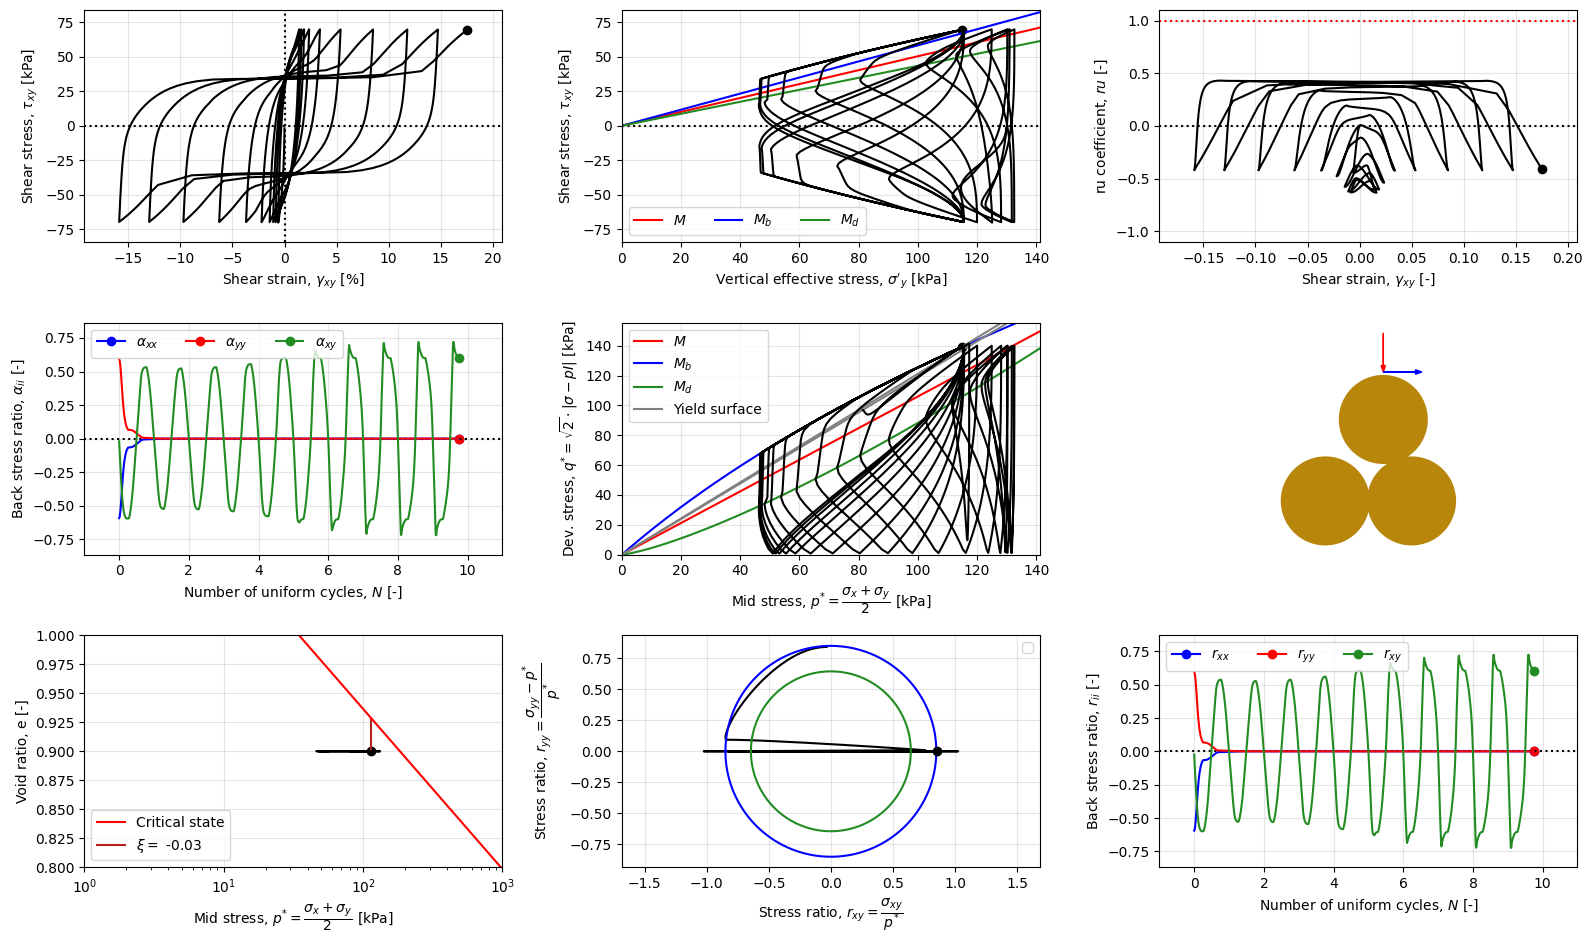

In [ ]:
nx = 4
ny = 3
nidx = 1950
for nidx in range(2000):
    plt.figure(figsize=(4*nx,4*ny))

    ax1 = plt.subplot2grid((nx,ny),(0,0))
    pf.plot_sxy_vs_gxy(ax1,data,nidx)

    ax1 = plt.subplot2grid((nx,ny),(0,1))
    pf.plot_sxy_vs_sy(ax1,data,params,nidx,xmin=0)

    ax1 = plt.subplot2grid((nx,ny),(1,0))
    pf.plot_alpha_vs_N(ax1,data,nidx)

    ax1 = plt.subplot2grid((nx,ny),(1,1))
    pf.plot_q_vs_p(ax1, data,params,nidx)

    ax1 = plt.subplot2grid((nx,ny),(2,0))
    pf.plot_e_vs_logp(ax1, data,params,nidx,ymin=0.8,ymax=1,xmin=1,xmax=1000)
                
    ax1 = plt.subplot2grid((nx,ny),(2,1))
    pf.plot_ryy_vs_rxy(ax1, data,params,nidx)

    ax1 = plt.subplot2grid((nx,ny),(0,2))
    pf.plot_ru_vs_gxy(ax1, data,params,nidx,ymax=1.1)

    ax1 = plt.subplot2grid((nx,ny),(1,2))
    pf.particles_plot(ax1, data,params,nidx)

    ax1 = plt.subplot2grid((nx,ny),(2,2))
    pf.plot_rxy_vs_N(ax1, data,params,nidx)
                
    plt.tight_layout()
    plt.savefig(str(nidx)+'.jpg',bbox_inches='tight',dpi=200)

In [5]:
data['N'].max()

10.0